## Scatter plot

Thus far we dealt with one dimensional data in our visualisations, sometimes adding a category to divide our data.
Here we take it a step further, scatter plots are to visualise the relation between 2 numerical features.

One remark that I would like to make here is that discrete numerical features (age, n_persons,...) are possible to use, yet when dealing with a small range (e.g. 0-10) the results are skewed.


In [1]:
import pandas as pd
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(16,8)})

For scatter plots I opted to use a dataset containing tips from a restaurant, the tips are divided in gender, smoker, time of day and day of week.

In [2]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


The most simple scatter plot we can make would be showing the relation between the total bill and the tip, we would assume the tip is proportional to the size of the bill.

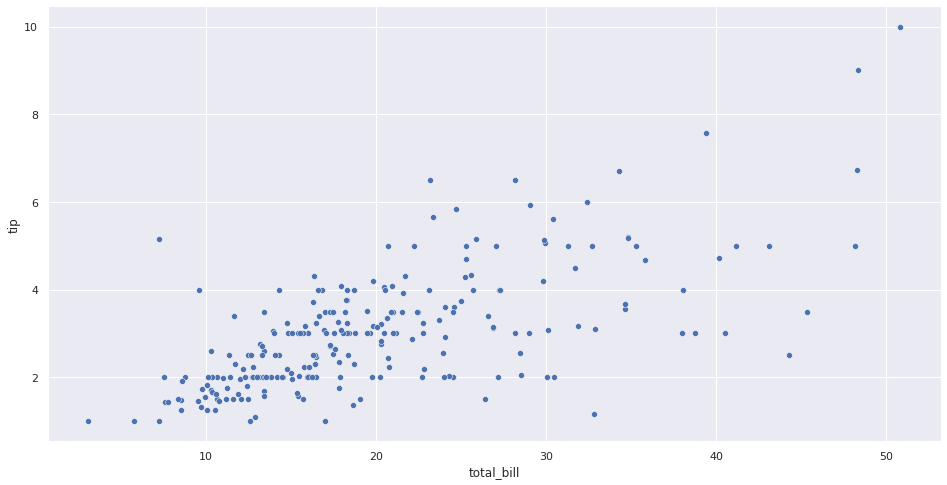

In [3]:
ax = sns.scatterplot(data=tips_df, x="total_bill", y="tip")

Just as expected, when the total bill rises, the tip grows too, we have some generous persons, and some less generous, but nothing out of the ordinary.

To get a better idea of the tipping habits we could calculate the tip per person in the bill, which is noted by size.
We divide the tip by the amount of people and plot again.

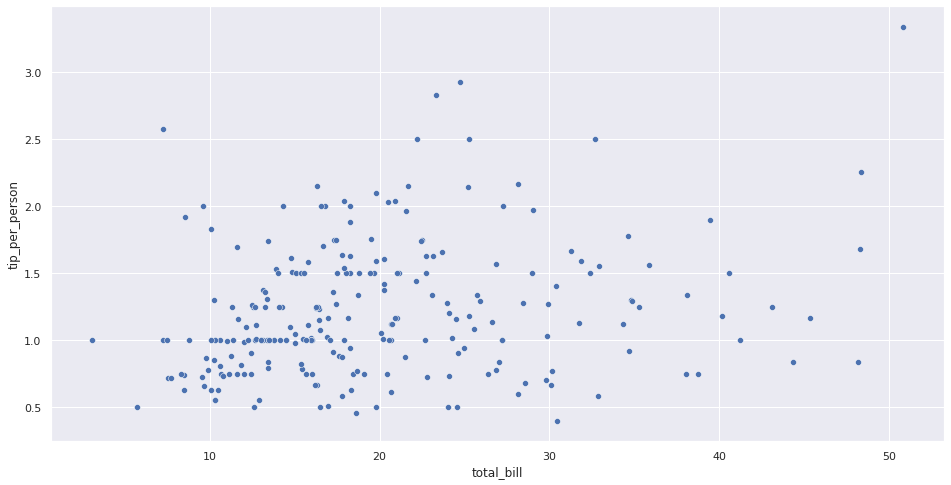

In [4]:
tips_df['tip_per_person'] = tips_df.tip/tips_df['size']
ax = sns.scatterplot(data=tips_df, x="total_bill", y="tip_per_person")

It is much harder to see a relation now, so we could argue that depending of the service everyone gives a specific amount.
So it is not the size of the bill that is defining the tip, rather the amount of persons (although this is very similar) in the bill.

Aside from feature engineering, we can also add categorical features, using different colors for each feature.
Here we added if they smoked or not.

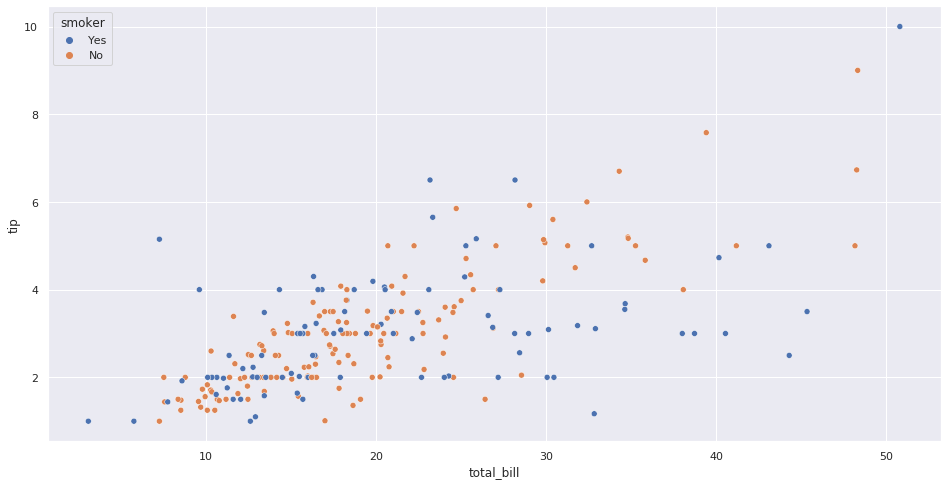

In [5]:
ax = sns.scatterplot(data=tips_df, x="total_bill", y="tip", hue='smoker')

It is hard to see if smoking had an effect on either the bill or the tip, which indicates that your plot is not that useful.
This is not true if you wanted to prove that there is no effect of smoking obviously!

We can also add a numerical feature into the scatter plot, by using sizes of our dots in the scatter plot.
The size of the group now influences the size of our dots.

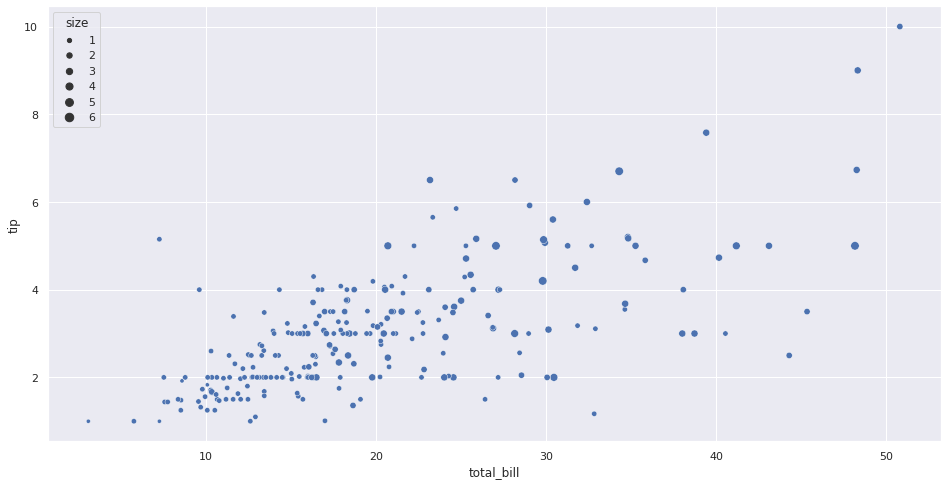

In [6]:
ax = sns.scatterplot(data=tips_df, x="total_bill", y="tip", size="size")

Whilst it might not be really visible because of the linear nature of the size - it is only going from 1 to 6 - the relation is not obvious.
Perhaps you could do some feature engineering where you artificially increase the size by taking the square?
You could argue if that is still representable, but for the sake of the exercise let's say it is.

In the beginning I talked about numerical features with a low range, the size of our group is one of them.
See what happens when i would use it in a scatter plot.

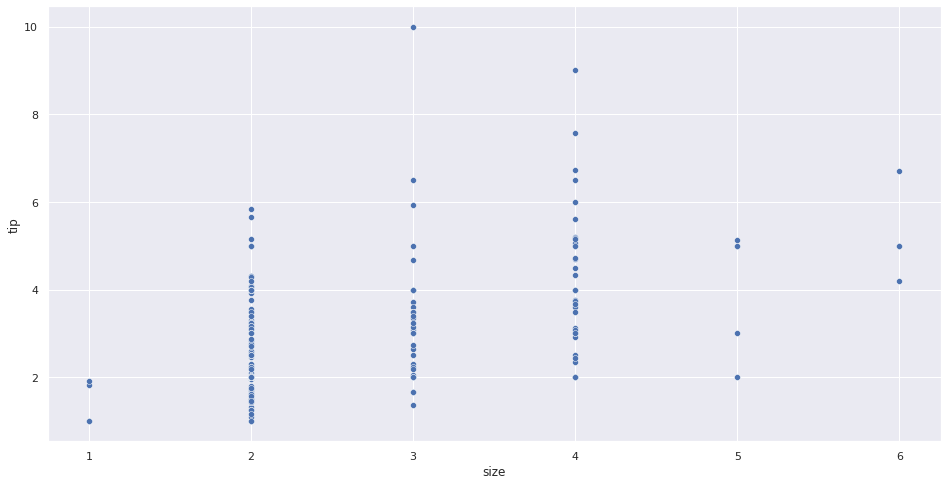

In [7]:
ax = sns.scatterplot(data=tips_df, x="size", y="tip")

It clearly shows that a higher size means statistical higher tips, up to a cut-off of 5 appearantly.
Yet do you feel this is an aesthetically satisfying plot?

Not going to much in the field of machine learning, seaborn has an interesting feature built-in.
They offer a regression plot, where a linear regression is draw with a confidence interval (the light blue area).
Not wanting to give mathematical number it shows what it thinks is the relation between the 2 variables.

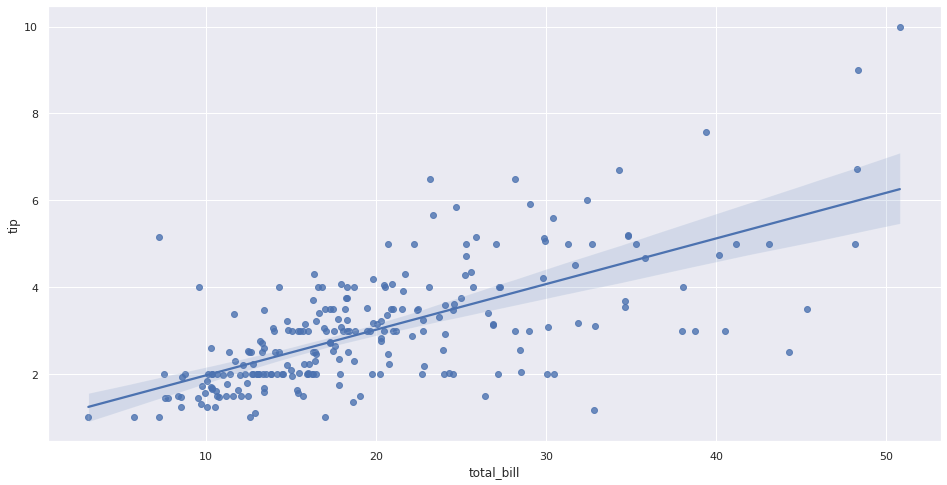

In [8]:
ax = sns.regplot(data=tips_df, x="total_bill", y="tip")

It seems to be very confident about the relation, how about where we corrected for group size?

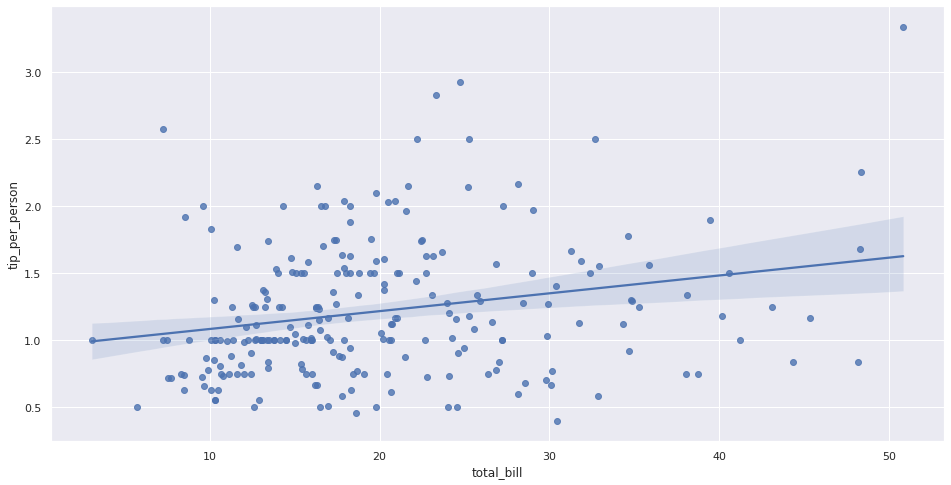

In [9]:
ax = sns.regplot(data=tips_df, x="total_bill", y="tip_per_person")

Less confident, less appearent.
Keep in mind that it will always see a relations, the question is how confident!